In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('BRCA Data.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.isnull().sum()


Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [9]:
df.drop(['Patient_ID'],axis=1,inplace=True)

In [10]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [20]:
import plotly.express as px

def generate_pie_chart(data, column_name):
    column_counts = data[column_name].value_counts()
    transactions = column_counts.index
    quantity = column_counts.values

    fig = px.pie(data, 
                 values=quantity, 
                 names=transactions, 
                 hole=0.6, 
                 title=f"{column_name} Distribution")
    fig.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'Patient_Status' is a column in it.
# generate_pie_chart(df, 'Patient_Status')


In [24]:
generate_pie_chart(df,'Gender')

In [25]:
generate_pie_chart(df,'Protein1')

In [26]:
generate_pie_chart(df,'Patient_Status')

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,0,0,1,86,172,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,0,0,151,78,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,0,0,2,49,76,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,0,0,1,144,105,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,0,0,2,39,258,1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x = df.drop(['Patient_Status'],axis=1)

In [38]:
y = df['Patient_Status']

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scale = StandardScaler()
x_ = scale.fit_transform(x)

In [43]:
x_

array([[-1.77444592, -0.11304668,  0.19813129, ..., -0.48952228,
        -0.0684668 ,  0.38387758],
       [-1.2278752 , -0.11304668, -0.72392005, ..., -1.45336428,
         1.21055255, -0.75908647],
       [ 0.80224464, -0.11304668,  0.44422196, ...,  0.47431972,
        -0.79652396, -0.78340485],
       ...,
       [ 0.17759238, -0.11304668, -1.27484183, ..., -1.45336428,
        -0.50136565,  0.25012647],
       [ 1.58305996, -0.11304668,  0.93302576, ..., -1.45336428,
         0.63991315,  0.3595592 ],
       [ 1.34881536, -0.11304668, -0.39970217, ..., -1.45336428,
        -0.50136565, -1.24545415]])

In [46]:
from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest = train_test_split(x_,y,test_size=.25,random_state=42)

In [47]:
model = RandomForestClassifier()

In [48]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [49]:
model.score(xtest,ytest)

0.825

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
y = model.predict(xtest)

In [52]:
accuracy_score(ytest,y)

0.825

In [53]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 217.9 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 297.7 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 481.4 kB/s eta 0:00:01
   ------------------------------------ - 225.3/235.6 kB 808.4 kB/s eta 0:00:01
   -------------------------------------- 235.6/235.6 kB 758.9 kB/s eta 0:00:00


In [77]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status', axis=1) , df[['Patient_Status']])

In [78]:
x_resampled.shape

(510, 14)

In [79]:
df2 = pd.concat([x_resampled,y_resampled],axis=1)

In [59]:
df2.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,2,0,0,0,0,1,86,172,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,1,2,0,0,0,0,151,78,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,2,0,0,0,0,2,49,76,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,1,0,0,0,0,1,144,105,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,1,0,0,0,0,2,39,258,1


In [80]:
X = df2.drop(['Patient_Status'],axis=1)

In [81]:
Y = df2['Patient_Status']

In [84]:
X_ = scale.fit_transform(X)

In [86]:
X_

array([[-1.77849395, -0.13403012,  0.23808764, ..., -0.55262541,
        -0.14607327,  0.48146242],
       [-1.22339486, -0.13403012, -0.72265853, ..., -1.54501611,
         1.10066432, -0.64078722],
       [ 0.83840177, -0.13403012,  0.49450576, ...,  0.43976529,
        -0.85575466, -0.66466488],
       ...,
       [-0.35109629, -0.13403012,  0.08389751, ...,  0.43976529,
         1.1198449 ,  1.15003668],
       [-2.09569343, -0.13403012,  0.3246247 , ..., -0.55262541,
        -1.62297779,  0.82768838],
       [-0.74759564, -0.13403012, -0.30297384, ..., -0.55262541,
         0.75541391, -1.18997322]])

In [127]:
model1 = RandomForestClassifier()
Xtrain,Xtest,Ytrain,Ytest  = train_test_split(X_,Y,test_size=.25,random_state=42)

In [128]:
model1.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [129]:
model1.score(Xtest,Ytest)
y_pred = model1.predict(Xtest)

In [130]:
accuracy_score(Ytest,y_pred)

1.0

In [92]:
from sklearn.metrics  import confusion_matrix

In [93]:
cm = confusion_matrix(Ytest,y_pred)

<Axes: >

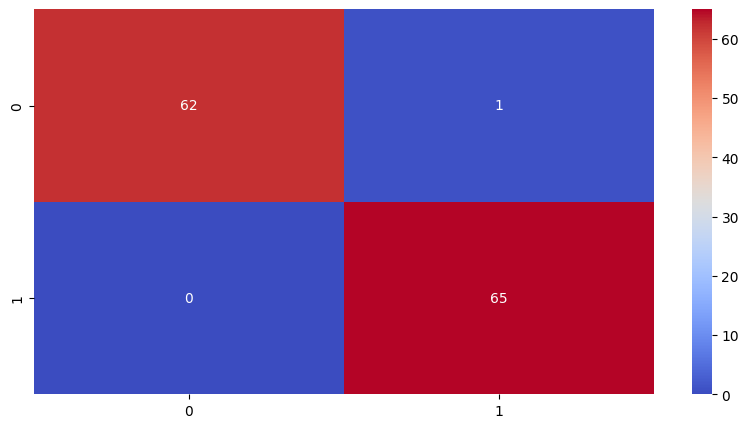

In [94]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True,cmap="coolwarm")

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
final_scores = cross_val_score(model1,Xtrain,Ytrain,cv=10)
print('The scores are: ',final_scores)
print('Acctual score is: ', final_scores.mean())

The scores are:  [0.92307692 0.97435897 0.94736842 0.86842105 0.86842105 0.92105263
 0.97368421 0.94736842 0.97368421 0.84210526]
Acctual score is:  0.9239541160593792


In [134]:
import pickle

# Save the model
with open('My_model.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)


In [135]:
# Load the model
with open('My_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [138]:
model_predict = loaded_model.predict(X)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [139]:
accuracy_score(Y,model_predict)

0.49607843137254903